In [2]:
import mitsuba as mi
import drjit as dr
import numpy as np
mi.set_variant('cuda_acoustic')
mi.variant()
import matplotlib.pyplot as plt

### Considerations for linear and logarithmically spaced spectra

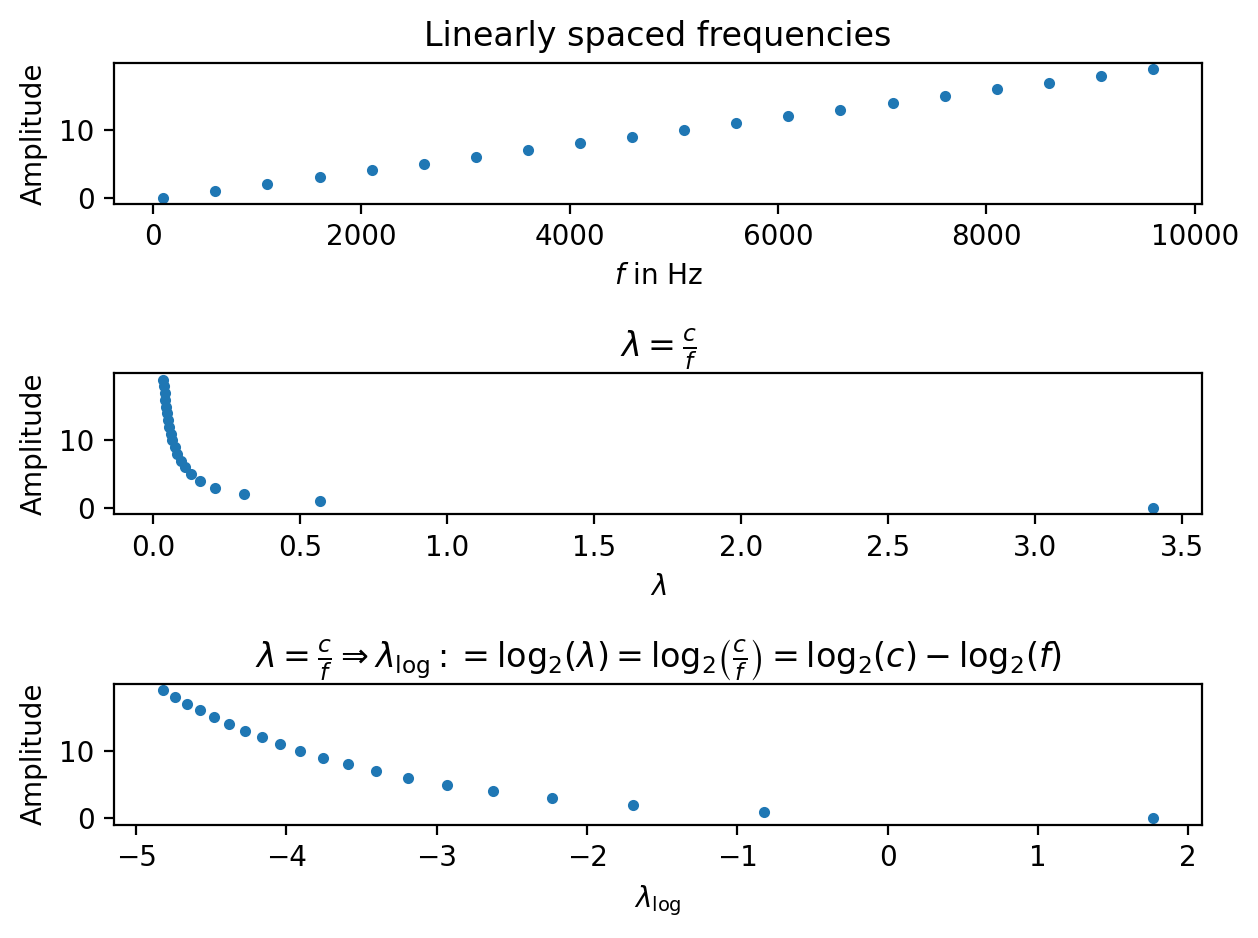

In [3]:
c = 340
# frequencies = np.array([125, 250, 500, 1000, 2000, 4000, 8000, 16000])
frequencies = np.arange(100, 10000, 500)
wavelengths = c / frequencies
wavelengths_log = np.log2(340) - np.log2(frequencies)
values = np.arange(len(frequencies))

fig, ax = plt.subplots(3,1)
ax[0].set_title('Linearly spaced frequencies')
ax[0].plot(frequencies, values, '.')
ax[0].set_xlabel(r'$f$ in Hz')
ax[0].set_ylabel('Amplitude')
ax[1].plot(wavelengths, values, '.')
ax[1].set_xlabel(r'$\lambda$')
ax[1].set_ylabel('Amplitude')
ax[1].set_title(r'$\lambda = \frac{c}{f}$')
ax[2].plot(wavelengths_log, values, '.')
ax[2].set_xlabel(r'$\lambda_\mathrm{log}$')
ax[2].set_ylabel('Amplitude')
ax[2].set_title(r'$\lambda = \frac{c}{f} \Rightarrow \lambda_\mathrm{log} := \log_2\left(\lambda \right) = \log_2\left( \frac{c}{f} \right) = \log_2\left( c \right) - \log_2\left( f \right)$')
fig.tight_layout()
plt.show()

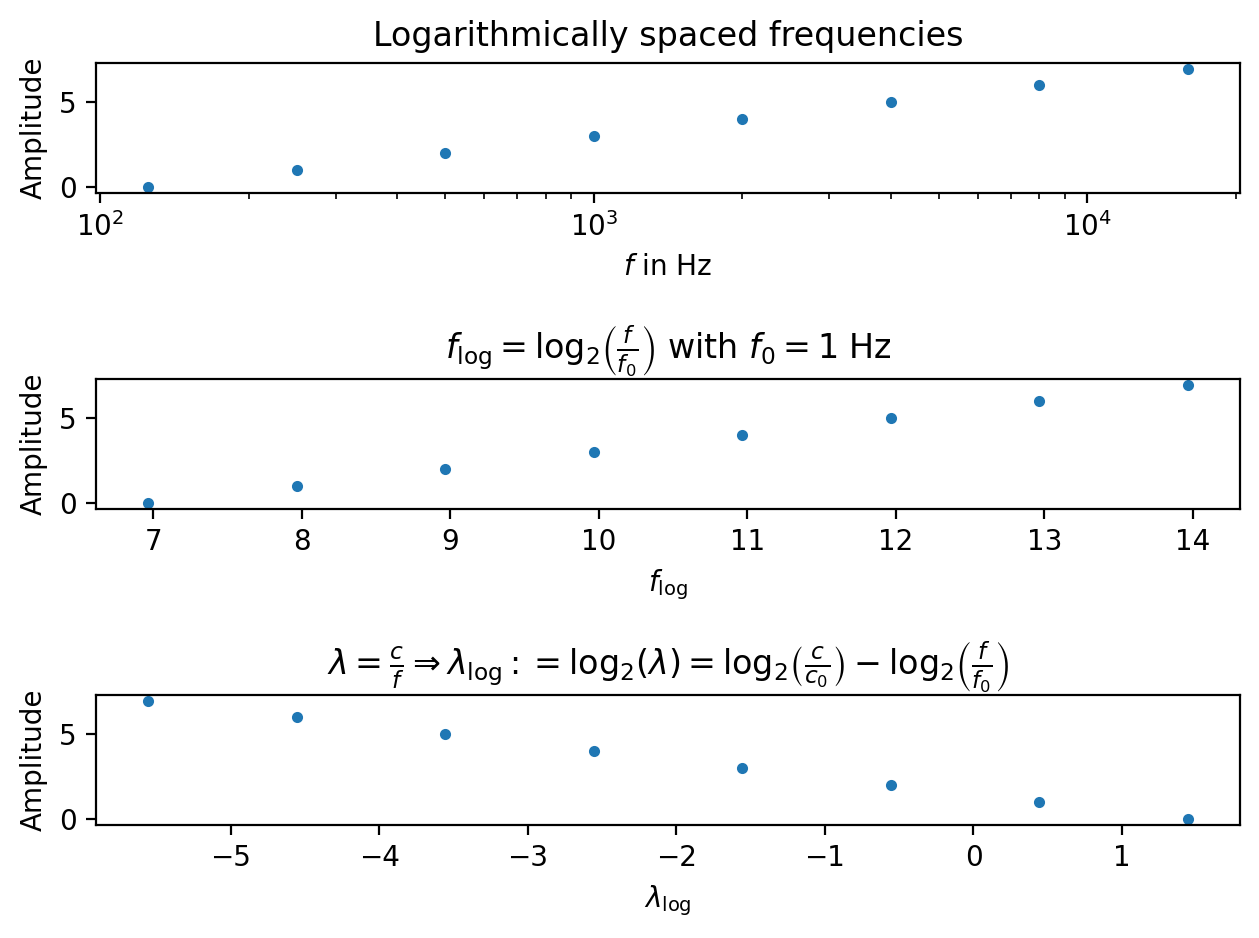

In [4]:
c = 340

frequencies = np.array([125, 250, 500, 1000, 2000, 4000, 8000, 16000])
wavelengths = c/frequencies
wavelengths_log = np.log2(c) - np.log2(frequencies)
values = np.arange(len(frequencies))

fig, ax = plt.subplots(3,1)
ax[0].set_title('Logarithmically spaced frequencies')
ax[0].semilogx(frequencies, values, '.')
ax[0].set_xlabel(r'$f$ in Hz')
ax[0].set_ylabel('Amplitude')
ax[1].plot(np.log2(frequencies), values, '.')
ax[1].set_xlabel(r'$f_\mathrm{log}$')
ax[1].set_ylabel('Amplitude')
ax[1].set_title(r'$f_\mathrm{log} = \log_2\left(\frac{f}{f_0} \right)$ with $f_0 = 1$ Hz')
ax[2].plot(wavelengths_log, values, '.')
ax[2].set_xlabel(r'$\lambda_\mathrm{log}$')
ax[2].set_ylabel('Amplitude')
ax[2].set_title(r'$\lambda = \frac{c}{f} \Rightarrow \lambda_\mathrm{log} := \log_2\left(\lambda \right) = \log_2\left( \frac{c}{c_0} \right) - \log_2\left( \frac{f}{f_0} \right)$')
fig.tight_layout()
plt.show()